# Time Series Basics

## Correlated Stock Prices

You're interested in the performance of a particular stock. You use the [autocorrelation function](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.autocorr.html) in Pandas to assess how autocorrelated your stock's values are.

Autocorrelation makes explicit the idea of temporal correlation we discussed previously. Suppose we wanted to see how correlated a stock's prices are with the immediately preceding day's stock prices. 

| Day | Price | Price with Lag = 1 | Price with Lag = 2 |
|-----|-------|--------------------|--------------------|
| 1   | 25    | NA                 | NA                 |
| 2   | 26    | 25                 | NA                 |
| 3   | 28    | 26                 | 25                 |
| 4   | 24    | 28                 | 26                 |
| 5   | 23    | 24                 | 28                 |

Autocorrelation with a lag of 1 will calculate the correlation between column "Price" and column "Price with Lag = 1." Autocorrelation with a lag of $k$ will calculate the correlation between stock price and the stock price of $k$ days before in a similar manner.

I build a loop that iterates through days (we'll assume our stock price is the closing price at every day) 1 to 365 to assess how correlated a stock price is with the stock price from $i$ days ago. (Sample code seen below.)

```
for i in range(1, 366):
    print(df[stock_prices].autocorr(lag=i))
```

#### 1. Suppose my highest values of autocorrelation are found when $i = 1, 7, 30, 365$. What do each of these suggest about the performance of this particular stock?

Stock prices vary quite rapidly. Looking at almost any plot of stock price over time, we'll see a very "wiggly" function that moves around erratically. Building a model for this can be difficult.

One way to "de-noise" or "smooth" this is to create a [moving average](http://www.investopedia.com/terms/m/movingaverage.asp) of stock prices. Suppose I wanted to create a moving average of stock prices across $k$ days. In this case, I create a new column that takes the current day and $k-1$ previous days (for $k$ total days) and average the stock prices of these days.

For example, I have a column of stock prices and a column associated with a moving average for three days. Then, my row for Day 5 includes the Day 5 stock price and the average of Day 3, Day 4, and Day 5 stock prices. 

| Day | Price | Moving Average k = 3 |
|-----|-------|----------------------|
| 1   | 25    | NA                   |
| 2   | 26    | NA                   |
| 3   | 28    | 26.33                |
| 4   | 24    | 26                   |
| 5   | 23    | 25                   |

#### 2.  As the number of periods $k$ increases, how do I expect my plotted curve to change?

As k increases, expect smoother curves because there are less points to plot

#### 3. Suppose we use our moving average to predict values of the stock price. As $k$ increases, how is the bias of our predictions affected? 

The bias of our model leans towards a 'buy and hold' mentality where trading is only considered in units of k 

#### 4. As $k$ increases, how is the variance of our predictions affected?

As k increases, we decrease the variance because we are creating shorter 'buckets' for the stock prices per period of k 

## Stock price exploration 

#### Using the `yfinance` package, download stock data from the past three years for a company you are interested in. 

In [ ]:
# I don't care much for stocks, due to my unavailability to even partipcate in the market, but I'd like to explore the S&P 500 without tech stocks 
# So, let's do some math

In [ ]:
# I'm going to define tech stocks as the top preforming technology companies: FAANG
# source: https://www.investors.com/etfs-and-funds/sectors/sp500-apple-best-stock-how-all-5-big-tech-companies-compare/

# Calculation of market cap was found here: https://www.investopedia.com/terms/s/sp500.asp
# Adding the sum of the FAANG stocks into their own index, then reweighting them in terms of the SNP 500 by considering trade volume and subtracting the influence of FAANG from the S&P index

In [3]:
import yfinance as y
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# There is a lot of debate, but for my analysis I am including microsoft as a FAANG, because I want to remove all major tech influences from the index

In [5]:
faang_tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB', 'NFLX']

In [6]:
snp = y.download('^GSPC', '2018-10-26', '2020-10-26')

[*********************100%***********************]  1 of 1 completed


In [7]:
snp.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-19,3493.659912,3502.419922,3419.929932,3426.919922,3426.919922,4086200000
2020-10-20,3439.379883,3476.929932,3435.649902,3443.120117,3443.120117,3901260000
2020-10-21,3439.909912,3464.860107,3433.060059,3435.560059,3435.560059,4097750000
2020-10-22,3438.500000,3460.530029,3415.340088,3453.489990,3453.489990,4163630000
2020-10-23,3464.899902,3466.459961,3440.449951,3465.389893,3465.389893,3646570000


In [8]:
faang = [y.download(i, '2018-10-26', '2020-10-26') for i in faang_tickers]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
faang_market_share = sum(faang)

In [10]:
faang_market_share['Market Cap'] = faang_market_share['Volume'] / snp['Volume']

In [11]:
faang_market_share = faang_market_share.drop(['Market Cap', 'Volume'], axis=1).apply(lambda x: np.asarray(x) * np.asarray(faang_market_share['Market Cap']))

In [12]:
adjusted_faang = faang_market_share.join(sum(faang)['Volume'])

In [13]:
snp_no_faang = snp - adjusted_faang

In [14]:
snp_no_faang

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-26,2450.658938,2466.084658,2415.209360,2439.590178,2439.865600,4487388300
2018-10-29,2459.003434,2481.764576,2400.010904,2431.908438,2432.179054,4363829800
2018-10-30,2458.843162,2497.148359,2454.945907,2495.424041,2495.665361,4804726600
2018-10-31,2516.189725,2540.727652,2516.992382,2519.237572,2519.482391,4814524400
2018-11-01,2492.780255,2512.040201,2487.479427,2512.247558,2512.530770,4390838600
...,...,...,...,...,...,...
2020-10-19,3234.240071,3240.953528,3168.623054,3174.355288,3174.355288,3910070100
2020-10-20,3164.727114,3197.078567,3162.973049,3167.314188,3167.314188,3718679200
2020-10-21,3200.211589,3221.833599,3196.266069,3196.770867,3196.770867,3931066000


#### Examine the data.

In [15]:
snp_no_faang.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2018-10-26 to 2020-10-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       502 non-null    float64
 1   High       502 non-null    float64
 2   Low        502 non-null    float64
 3   Close      502 non-null    float64
 4   Adj Close  502 non-null    float64
 5   Volume     502 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


In [16]:
snp_no_faang.describe()

,Open,High,Low,Close,Adj Close,Volume
count,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,2775.333369,2791.130428,2757.485860,2775.748421,2775.845052,3.978793e+09
std,234.826569,230.544897,240.920836,235.633873,235.588536,1.169456e+09
min,2063.188369,2065.144881,1969.812441,2004.679589,2004.740468,1.229452e+09
25%,2644.467018,2655.066997,2618.339530,2643.638054,2643.828821,3.280909e+09
50%,2771.747023,2788.085838,2761.894751,2778.893987,2778.904829,3.619919e+09
75%,2961.603699,2971.823710,2940.600694,2959.646561,2959.697848,4.347817e+09
max,3268.938357,3288.852851,3264.461585,3263.218889,3263.218889,8.500747e+09


#### We'll be working with the 'Adj Close' column. Rename that column 'price' and make your DataFrame just that column and the datetime index. 

In [17]:
snp_no_faang = snp_no_faang.rename({'Adj Close': 'price'}, axis=1)

In [18]:
df = snp_no_faang[['price']]

In [19]:
df.head()

,price
Date,
2018-10-26,2439.865600
2018-10-29,2432.179054
2018-10-30,2495.665361
2018-10-31,2519.482391
2018-11-01,2512.530770


#### Make a column that is the `price` of the previous day.

In [20]:
df.loc[:, 'price p'] = df.loc[:, ['price']].copy().shift(1)

/home/vivi/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/vivi/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [21]:
df.head()

,price,price p
Date,,
2018-10-26,2439.865600,NaN
2018-10-29,2432.179054,2439.865600
2018-10-30,2495.665361,2432.179054
2018-10-31,2519.482391,2495.665361
2018-11-01,2512.530770,2519.482391


#### Split the DataFrame into training and test sets so that the test set is the most recent year of data (you can use pandas slicing, scikit-learn, or sktime packages to do this).

In [22]:
train = df[df.index < '2019-10-26']
test = df[df.index > '2019-10-26']

In [23]:
train = train.dropna()
test = test.dropna()

#### Plot the stock price with different colors for the training and test sets.

Text(0.5, 1.0, 'Visualization of Closing Prices for S&P 500 without FAANG')

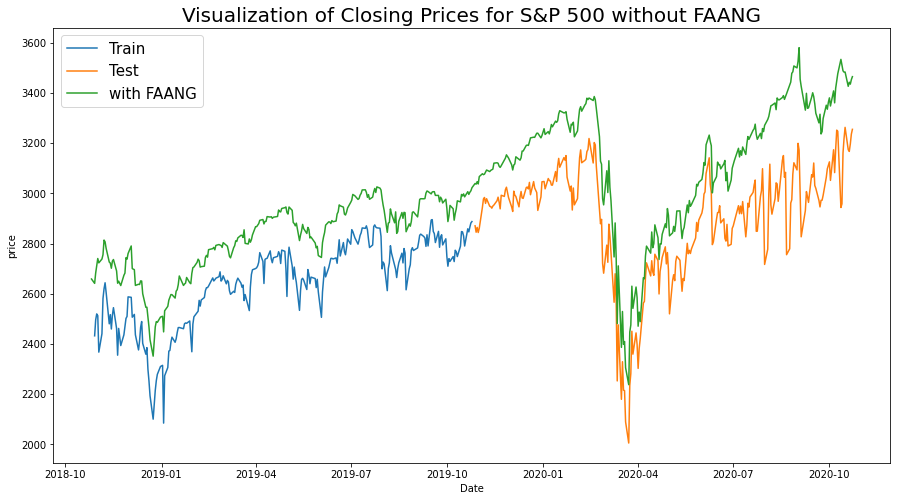

In [24]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=train['price'], label='Train')
sns.lineplot(data=test['price'], label='Test')
sns.lineplot(data=snp['Adj Close'], label='with FAANG')
plt.legend(fontsize=15);
plt.title('Visualization of Closing Prices for S&P 500 without FAANG', fontsize=20)

#### Find the autocorrelation of the training data.

In [25]:
train['price'].autocorr()

0.9502933485492818

#### Plot the autocorrelation using statsmodels `plot_acf`.

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

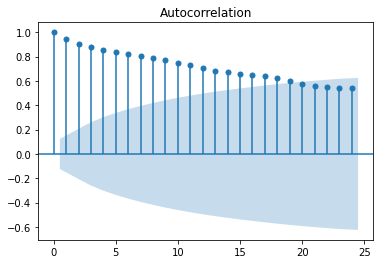

In [27]:
plot_acf(train['price']);

#### Plot the partial autocorrelation values using statsmodels `plot_pacf`.

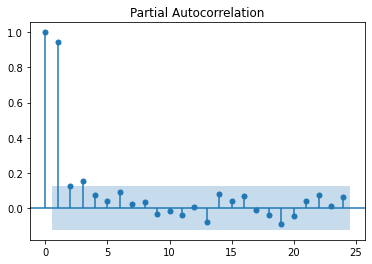

In [28]:
plot_pacf(train['price']);

#### Do any values show high autocorrelation?

In [29]:
# High autocorrelation is relative. There is no strong correlation for the first two years; the correlation keeps decreasing

In [30]:
# Looking at partial, you can see a cyclic cycle of the two years which may indicate the business cycle and the yearly finance cycle
# which matches up with 1, 2, 3, 4 quarter reports

#### Make a baseline model that is just the last value from the training set.

In [31]:
train.iloc[-1]['price']

2887.617029132759

In [32]:
df_predictions = pd.DataFrame(np.ones(len(test['price'])) * train.iloc[-1]['price'], columns=['Naive'], index=test.index)

In [33]:
df_predictions

,Naive
Date,
2019-10-28,2887.617029
2019-10-29,2887.617029
2019-10-30,2887.617029
2019-10-31,2887.617029
2019-11-01,2887.617029
...,...
2020-10-19,2887.617029
2020-10-20,2887.617029
2020-10-21,2887.617029


#### Score it on the test set using MAE

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mean_absolute_error(test['price'], df_predictions['Naive'])

173.9954448603214

Text(0.5, 1.0, 'Visualization of Closing Prices for S&P 500 without FAANG')

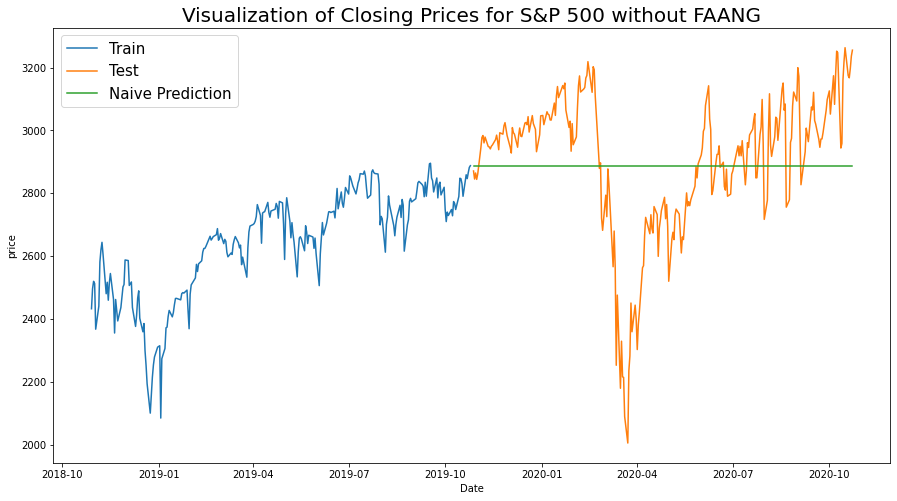

In [36]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=train['price'], label='Train')
sns.lineplot(data=test['price'], label='Test')
sns.lineplot(data=df_predictions['Naive'], label='Naive Prediction')
plt.legend(fontsize=15);
plt.title('Visualization of Closing Prices for S&P 500 without FAANG', fontsize=20)

#### Using scikit-learn's LinearRegression class, make a model to predict the stock price based on the stock price from the day before. This is a very basic model that doesn't consider trend or seasonality.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

#### Predict, plot, and score on MAE.

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(np.asarray(train['price p']).reshape(-1,1), np.asarray(train['price']).reshape(-1,1))

LinearRegression()

In [40]:
df_predictions['lr'] = lr.predict(np.asarray(test['price p']).reshape(-1,1))

In [41]:
mean_absolute_error(test['price'], df_predictions['lr'])

62.73910938651286

#### How does the model do?

Text(0.5, 1.0, 'Visualization of Closing Prices for S&P 500 without FAANG')

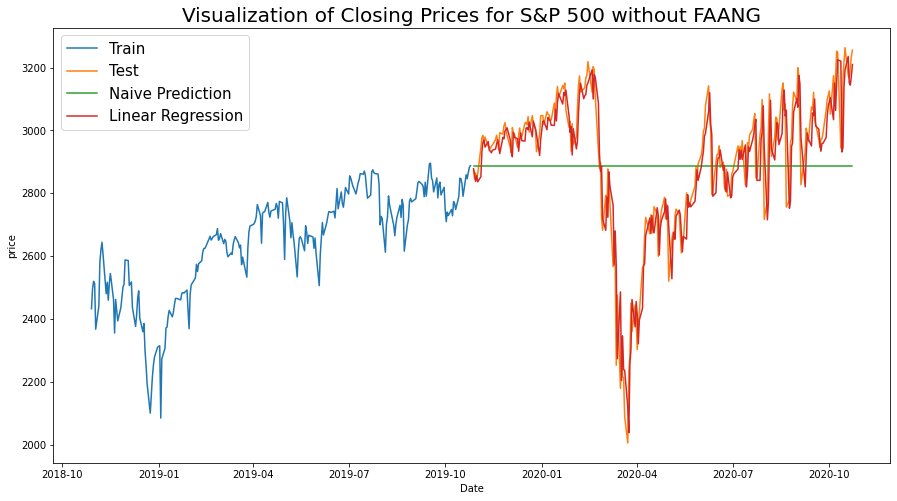

In [42]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=train['price'], label='Train')
sns.lineplot(data=test['price'], label='Test')
sns.lineplot(data=df_predictions['Naive'], label='Naive Prediction')
sns.lineplot(data=df_predictions['lr'], label='Linear Regression')
plt.legend(fontsize=15);
plt.title('Visualization of Closing Prices for S&P 500 without FAANG', fontsize=20)

#### Congratulations! You just made an autoregression model (AR)! 🎉